In [103]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [104]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [105]:
internet_data = pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [106]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Combining all data

In [107]:
#merging
df1 = pd.merge(churn_data, customer_data, how = 'inner', on ='customerID')
df = pd.merge(df1,internet_data, how= 'inner', on = 'customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [109]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [110]:
col = ['PhoneService' , 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
df[col] = df[col].apply(lambda x: x.map({'Yes':1,'No':0}))

In [111]:
df[col].head()

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0


In [112]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [113]:
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender','InternetService']], drop_first = True)

In [114]:
telecom = pd.concat([df,dummy1], axis = 1)

In [115]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [116]:
dummy1.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0


In [117]:
telecom["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [118]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [119]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [120]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [121]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [122]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [123]:
num_col = telecom[['tenure','MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]
num_col.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [124]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [125]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [126]:
telecom = telecom[~np.isnan(telecom.TotalCharges)]

In [127]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [128]:
#rate of churn
churn = (sum(telecom.Churn)/len(telecom.Churn.index))*100
churn

26.578498293515356

In [129]:
#train_test split

from sklearn.model_selection import train_test_split
y = telecom['Churn']
X = telecom.drop(['customerID','Churn'], axis = 1)


In [130]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [131]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3 , random_state = 0)


In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()
scal_cols = ['tenure','MonthlyCharges','TotalCharges']
X_train[scal_cols] = scaler.fit_transform(X_train[scal_cols])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
6814,1.008462,1,0,0.971385,1.393222,1,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
791,1.457351,1,1,0.401273,1.209747,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,1
562,-1.031942,1,0,0.161226,-0.778222,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,1
298,0.314725,1,1,0.322925,0.324350,0,1,1,0,0,...,1,0,0,1,1,0,0,1,0,1
5156,-0.623861,1,0,-0.292196,-0.588196,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


<AxesSubplot:>

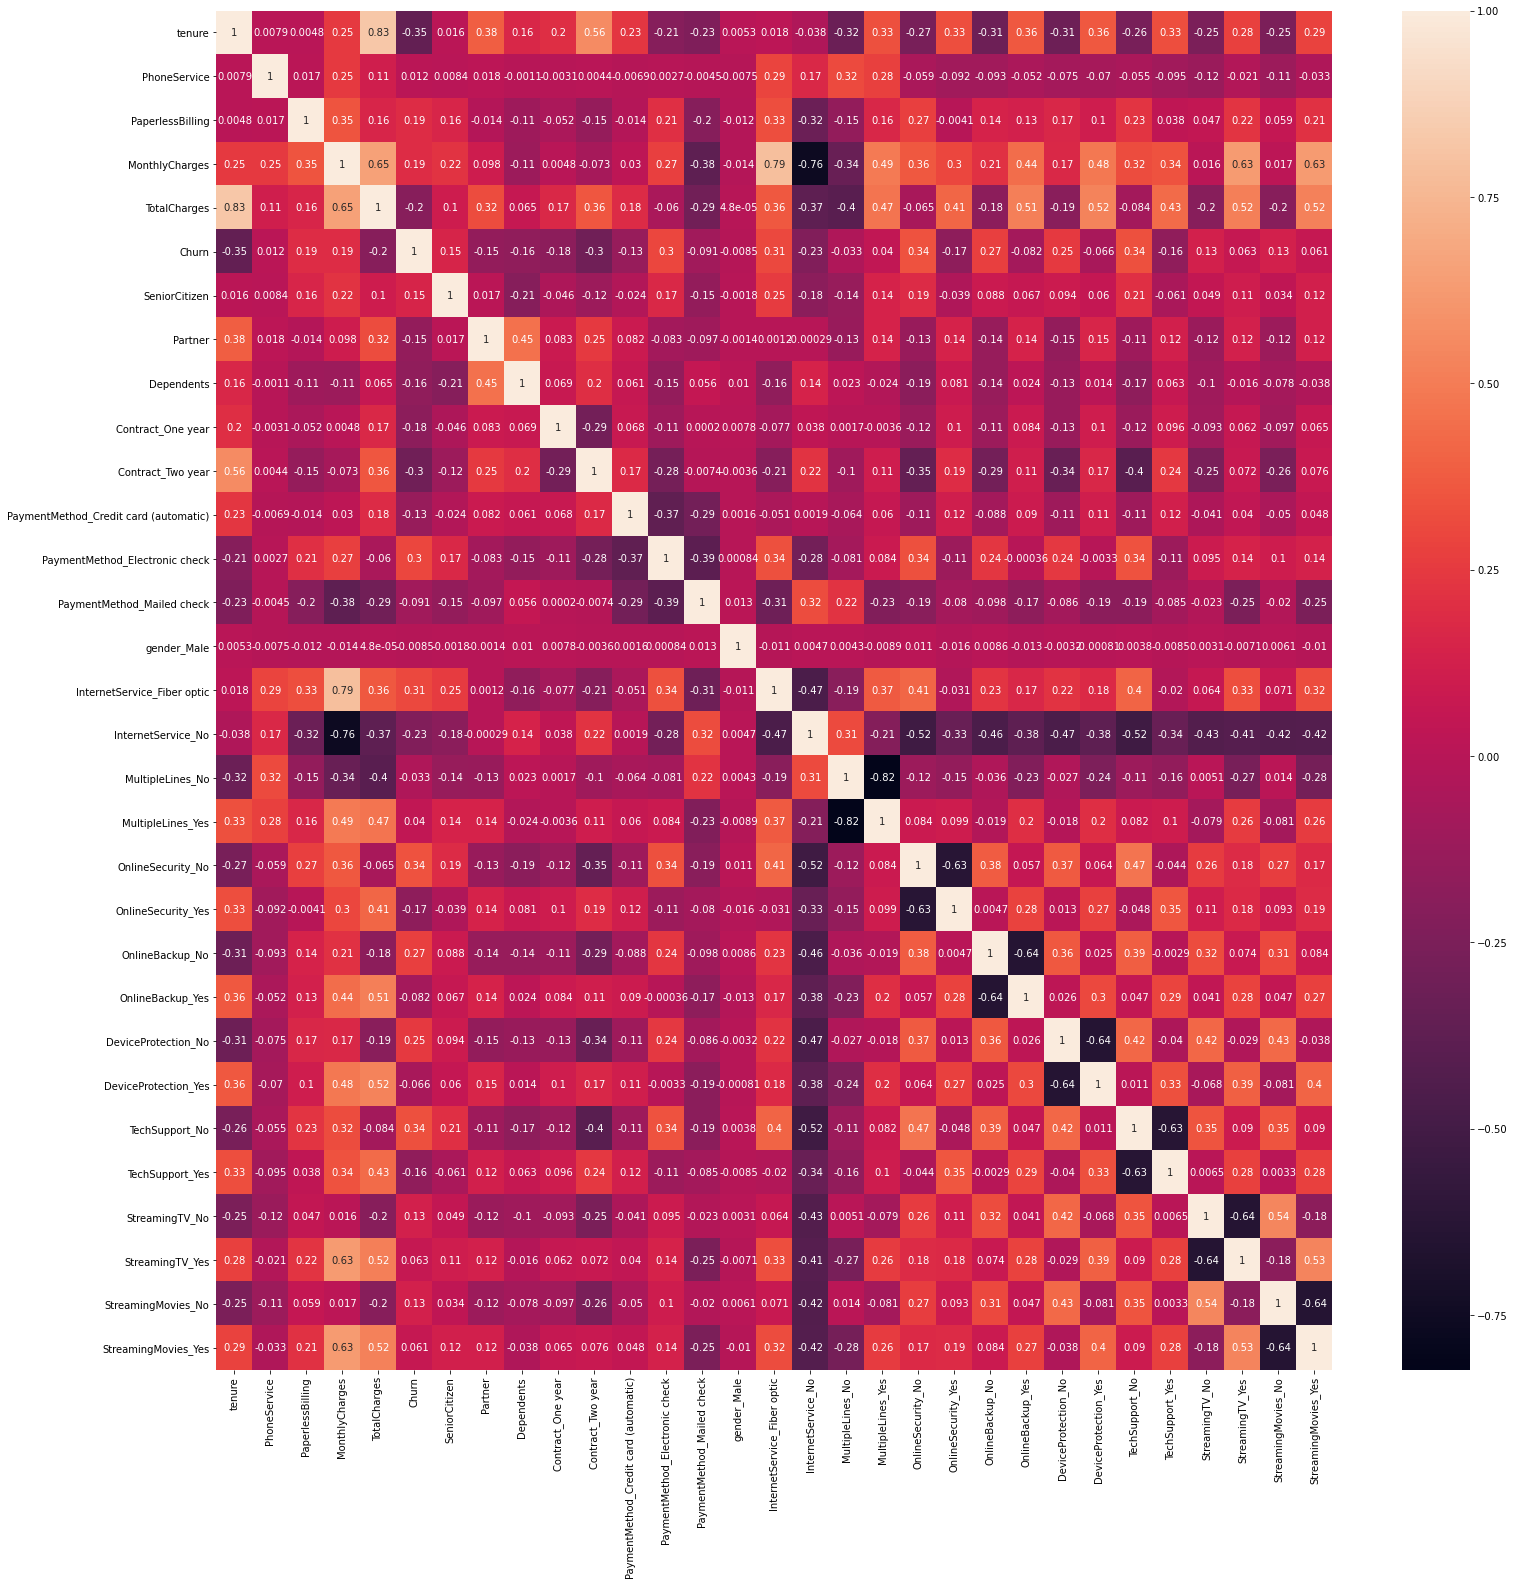

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25,25))
sns.heatmap(telecom.corr(), annot = True)

In [135]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
5561,1,1,0,20.65,20.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5814,16,1,1,20.60,330.25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2645,1,1,0,19.80,19.80,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3983,1,0,1,24.25,24.25,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
6438,1,1,1,74.40,74.40,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [136]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], axis = 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], axis = 1)

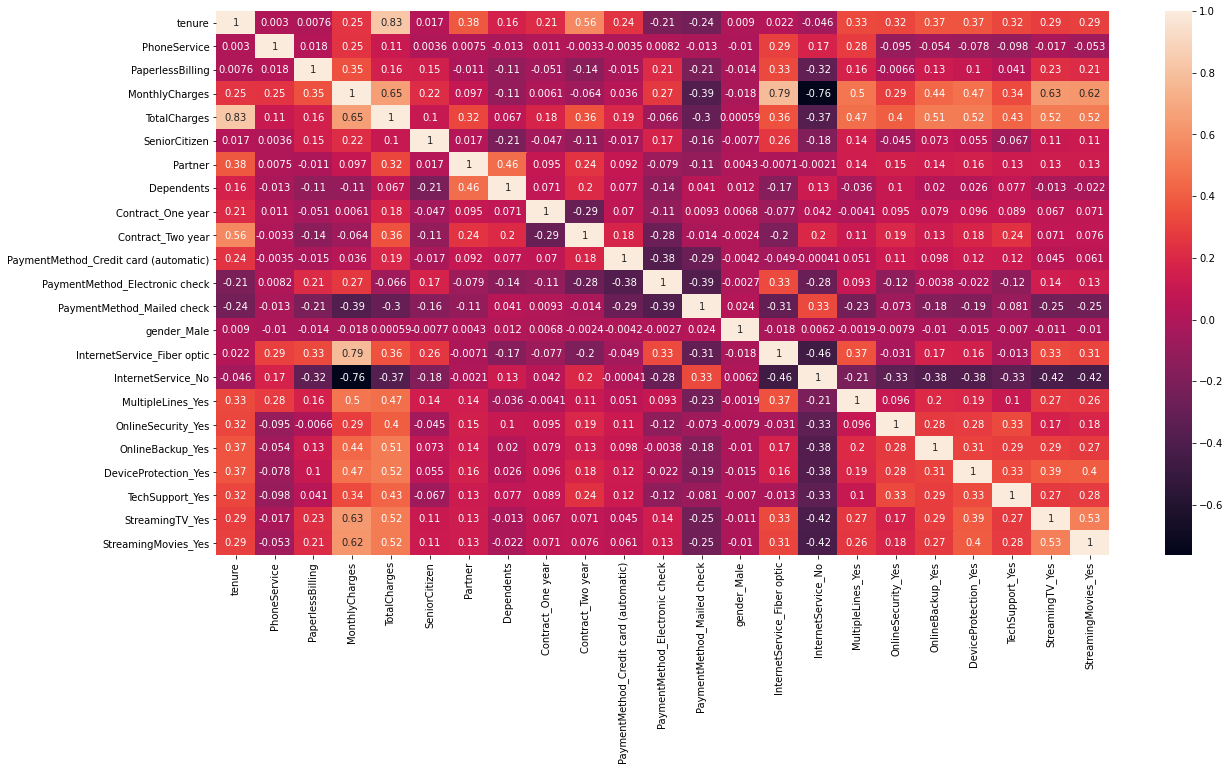

In [137]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [138]:
import statsmodels.api as sm

In [139]:
X_train_sm = sm.add_constant(X_train)
log1 = sm.GLM(y_train , X_train_sm, family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.6
Date:                Thu, 23 Dec 2021   Deviance:                       4043.1
Time:                        14:37:07   Pearson chi2:                 5.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.4345      1.551     -2.214      0.027      -6.475      -0.394
tenure                                   -1.5439      0.184     -8.373      0.000      -1.905      -1.182
PhoneService                              0.4871      0.786      0.620      0.535      -1.053       2.027
PaperlessBilling                          0.4602      0.090      5.112      0.000       0.284       0.637
MonthlyCharges                           -1.6799      1.157     -1.452      0.147      -3.948       0.588
TotalCharges                              0.7620      0.194      3.933      0.000       0.382       1.142
SeniorCitizen                             0.3360      0.102      3.283      0.001       0.135       0.537
Partner                                   0.0690      0.094      0.731      0.465      -0.116       0.254
Dependents                               -0.2294      0.109     -2.103      0.035      -0.443      -0.016
Contract_One year                        -0.6635      0.130     -5.117      0.000      -0.918      -0.409
Contract_Two year                        -1.3639      0.213     -6.413      0.000      -1.781      -0.947
PaymentMethod_Credit card (automatic)    -0.2457      0.139     -1.771      0.077      -0.518       0.026
PaymentMethod_Electronic check            0.3093      0.113      2.729      0.006       0.087       0.531
PaymentMethod_Mailed check               -0.1095      0.139     -0.789      0.430      -0.381       0.162
gender_Male                               0.0300      0.078      0.385      0.700      -0.123       0.183
InternetService_Fiber optic               2.0792      0.971      2.141      0.032       0.176       3.982
InternetService_No                       -2.0677      0.978     -2.113      0.035      -3.985      -0.150
MultipleLines_Yes                         0.5434      0.215      2.523      0.012       0.121       0.966
OnlineSecurity_Yes                       -0.0575      0.217     -0.265      0.791      -0.484       0.369
OnlineBackup_Yes                          0.0195      0.212      0.092      0.927      -0.397       0.436
DeviceProtection_Yes                      0.3489      0.213      1.636      0.102      -0.069       0.767
TechSupport_Yes                          -0.1100      0.218     -0.505      0.614      -0.537       0.317
StreamingTV_Yes                           0.7386      0.397      1.859      0.063      -0.040       1.517
StreamingMovies_Yes                       0.7854      0.397      1.980      0.048       0.008       1.563
=========================================================================================================
"""

# RFE

In [140]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [141]:
logreg = LogisticRegression()

In [142]:
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train, y_train)

In [143]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 5),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 6),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 3),
 ('StreamingMovies_Yes', True, 1)]

In [144]:
cols = X_train.columns[rfe.support_]
cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingMovies_Yes'],
      dtype='object')

# RFE is done start with statsmodel again

In [145]:
X_train = X_train[cols]
X_train_sm = sm.add_constant(X_train)
log = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log = log.fit()
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.7
Date:                Thu, 23 Dec 2021   Deviance:                       4057.4
Time:                        14:37:08   Pearson chi2:                 5.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2456      0.173     -7.185      0.000      -1.585      -0.906
tenure                            -1.6005      0.179     -8.942      0.000      -1.951      -1.250
PhoneService                      -0.6568      0.159     -4.127      0.000      -0.969      -0.345
PaperlessBilling                   0.4733      0.090      5.284      0.000       0.298       0.649
TotalCharges                       0.8614      0.187      4.617      0.000       0.496       1.227
SeniorCitizen                      0.3673      0.100      3.670      0.000       0.171       0.563
Contract_One year                 -0.6614      0.129     -5.144      0.000      -0.913      -0.409
Contract_Two year                 -1.3741      0.212     -6.488      0.000      -1.789      -0.959
PaymentMethod_Electronic check     0.4318      0.083      5.221      0.000       0.270       0.594
InternetService_Fiber optic        0.6866      0.117      5.868      0.000       0.457       0.916
InternetService_No                -0.7089      0.162     -4.386      0.000      -1.026      -0.392
MultipleLines_Yes                  0.2725      0.095      2.863      0.004       0.086       0.459
OnlineSecurity_Yes                -0.3569      0.101     -3.535      0.000      -0.555      -0.159
OnlineBackup_Yes                  -0.2665      0.093     -2.853      0.004      -0.450      -0.083
TechSupport_Yes                   -0.3796      0.103     -3.695      0.000      -0.581      -0.178
StreamingMovies_Yes                0.2708      0.095      2.866      0.004       0.086       0.456
==================================================================================================
"""

In [146]:
y_train_pred = log.predict(X_train_sm)
y_train_pred[:10]

6814    0.271775
791     0.030439
562     0.267517
298     0.336629
5156    0.063242
1303    0.001206
3026    0.664362
6831    0.777897
5075    0.482966
2405    0.726177
dtype: float64

In [147]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27177536, 0.03043857, 0.26751703, 0.33662912, 0.06324181,
       0.00120639, 0.66436229, 0.77789684, 0.48296575, 0.72617668])

In [148]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.271775,6814
1,0,0.030439,791
2,0,0.267517,562
3,0,0.336629,298
4,0,0.063242,5156


In [149]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(20)

,Churn,Churn_prob,CustID,predicted
0,0,0.271775,6814,0
1,0,0.030439,791,0
2,0,0.267517,562,0
3,0,0.336629,298,0
4,0,0.063242,5156,0
5,0,0.001206,1303,0
6,1,0.664362,3026,1
7,1,0.777897,6831,1
8,0,0.482966,5075,0
9,1,0.726177,2405,1


In [150]:
from sklearn import metrics
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)

# Calculate accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8092238927265339


In [151]:
confusion

array([[3248,  360],
       [ 579,  735]], dtype=int64)

# VIF

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,8.84
3,TotalCharges,7.84
0,tenure,6.78
8,InternetService_Fiber optic,4.06
6,Contract_Two year,3.20
9,InternetService_No,3.20
2,PaperlessBilling,2.75
10,MultipleLines_Yes,2.52
14,StreamingMovies_Yes,2.42
12,OnlineBackup_Yes,2.06


In [154]:
X_train = X_train.drop('PhoneService', 1)

In [155]:
X_train_sm = sm.add_constant(X_train)
log = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log = log.fit()
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2037.2
Date:                Thu, 23 Dec 2021   Deviance:                       4074.3
Time:                        14:37:08   Pearson chi2:                 5.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6968      0.136    -12.459      0.000      -1.964      -1.430
tenure                            -1.4438      0.174     -8.278      0.000      -1.786      -1.102
PaperlessBilling                   0.4721      0.089      5.290      0.000       0.297       0.647
TotalCharges                       0.7101      0.183      3.883      0.000       0.352       1.068
SeniorCitizen                      0.3914      0.100      3.918      0.000       0.196       0.587
Contract_One year                 -0.6811      0.128     -5.313      0.000      -0.932      -0.430
Contract_Two year                 -1.3756      0.211     -6.508      0.000      -1.790      -0.961
PaymentMethod_Electronic check     0.4427      0.082      5.366      0.000       0.281       0.604
InternetService_Fiber optic        0.5328      0.109      4.869      0.000       0.318       0.747
InternetService_No                -0.8975      0.154     -5.841      0.000      -1.199      -0.596
MultipleLines_Yes                  0.2075      0.093      2.231      0.026       0.025       0.390
OnlineSecurity_Yes                -0.3688      0.101     -3.659      0.000      -0.566      -0.171
OnlineBackup_Yes                  -0.2469      0.093     -2.650      0.008      -0.430      -0.064
TechSupport_Yes                   -0.3831      0.103     -3.736      0.000      -0.584      -0.182
StreamingMovies_Yes                0.3212      0.094      3.427      0.001       0.137       0.505
==================================================================================================
"""

In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.76
0,tenure,6.66
7,InternetService_Fiber optic,3.19
5,Contract_Two year,3.06
1,PaperlessBilling,2.62
13,StreamingMovies_Yes,2.40
8,InternetService_No,2.28
9,MultipleLines_Yes,2.27
11,OnlineBackup_Yes,2.00
12,TechSupport_Yes,1.92


In [157]:
y_train_pred = log.predict(X_train_sm).values.reshape(-1)

In [158]:
y_train_pred[:10]

array([0.27738647, 0.03776448, 0.30849753, 0.38285996, 0.07512181,
       0.00164293, 0.65370548, 0.77719739, 0.49982485, 0.73732831])

In [159]:
y_train_pred_final['Churn_prob'] = y_train_pred
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.277386,6814,0
1,0,0.037764,791,0
2,0,0.308498,562,0
3,0,0.382860,298,0
4,0,0.075122,5156,0


In [160]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.277386,6814,0
1,0,0.037764,791,0
2,0,0.308498,562,0
3,0,0.382860,298,0
4,0,0.075122,5156,0


In [161]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.806989028850061


In [162]:
X_train = X_train.drop('TotalCharges', axis = 1)

In [163]:
X_train_sm = sm.add_constant(X_train)
log = sm.GLM(y_train, X_train_sm , family = sm.families.Binomial())
log = log.fit()
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.1
Date:                Thu, 23 Dec 2021   Deviance:                       4090.2
Time:                        14:37:08   Pearson chi2:                 4.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8199      0.132    -13.821      0.000      -2.078      -1.562
tenure                            -0.8327      0.066    -12.696      0.000      -0.961      -0.704
PaperlessBilling                   0.4708      0.089      5.292      0.000       0.296       0.645
SeniorCitizen                      0.3923      0.100      3.910      0.000       0.196       0.589
Contract_One year                 -0.6649      0.127     -5.240      0.000      -0.914      -0.416
Contract_Two year                 -1.3465      0.209     -6.449      0.000      -1.756      -0.937
PaymentMethod_Electronic check     0.4343      0.083      5.257      0.000       0.272       0.596
InternetService_Fiber optic        0.7348      0.096      7.642      0.000       0.546       0.923
InternetService_No                -0.8956      0.153     -5.859      0.000      -1.195      -0.596
MultipleLines_Yes                  0.2754      0.091      3.026      0.002       0.097       0.454
OnlineSecurity_Yes                -0.3203      0.100     -3.197      0.001      -0.517      -0.124
OnlineBackup_Yes                  -0.1786      0.092     -1.950      0.051      -0.358       0.001
TechSupport_Yes                   -0.3206      0.101     -3.160      0.002      -0.519      -0.122
StreamingMovies_Yes                0.4229      0.090      4.705      0.000       0.247       0.599
==================================================================================================
"""

In [164]:
y_train_pred = log.predict(X_train_sm).values.reshape(-1)

In [165]:
y_train_pred[:10]

array([0.26643626, 0.04617199, 0.29777596, 0.38259635, 0.07840872,
       0.0049201 , 0.65676141, 0.79861717, 0.47823941, 0.74427154])

In [166]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [167]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.266436,6814,0
1,0,0.046172,791,0
2,0,0.297776,562,0
3,0,0.382596,298,0
4,0,0.078409,5156,0


In [168]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)

In [169]:
confusion

array([[3252,  356],
       [ 590,  724]], dtype=int64)

In [170]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8078017066233238


In [171]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

print(TP,TN,FP,FN)

724 3252 356 590


In [172]:
#sensitivity
TP / float(TP+FN)

0.5509893455098934

In [173]:
#specificity
TN / float(TN+FP)

0.9013303769401331

In [174]:
#false positive rate
FP / float(FP+TN)

0.09866962305986696

In [175]:
#positive predictive value
TP/float(FP+TP)

0.6703703703703704

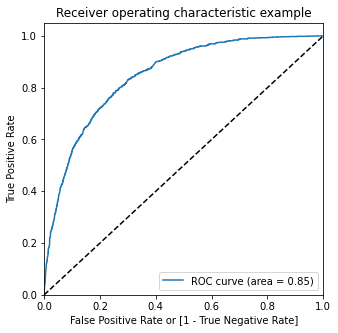

In [176]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

## Precision

In [177]:
TP / float(TP+FP)

0.6703703703703704

### Recall

In [178]:
TP/ float(TP+FN)

0.5509893455098934

In [179]:
from sklearn.metrics import precision_score , recall_score

In [180]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6703703703703704

In [181]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5509893455098934

In [182]:
# precision and recall trade off

In [183]:
from sklearn.metrics import precision_recall_curve

In [184]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4917    0
 4918    0
 4919    1
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [185]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

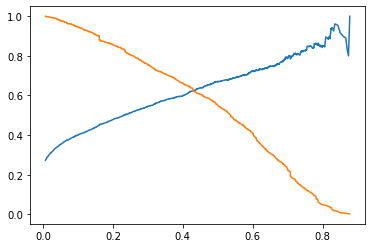

In [186]:
plt.plot(thresholds, p[:-1])
plt.plot(thresholds, r[:-1])

In [187]:
X_test[scal_cols]= scaler.transform(X_test[scal_cols])

In [188]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
5561,-1.276791,1,0,-1.474094,-0.996786,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
5814,-0.664670,1,1,-1.475761,-0.860222,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2645,-1.276791,1,0,-1.502433,-0.997161,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3983,-1.276791,0,1,-1.354071,-0.995198,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6438,-1.276791,1,1,0.317924,-0.973077,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0


In [189]:
X_test = X_test[cols]
X_test = X_test.drop(['PhoneService','TotalCharges'],1)

In [190]:
X_test_sm = sm.add_constant(X_test)

In [191]:
y_test_pred = log.predict(X_test_sm)

In [192]:
y_test_pred[:10]

5561    0.228299
5814    0.155622
2645    0.160807
3983    0.537035
6438    0.825050
4561    0.386171
6271    0.421215
4081    0.707490
3937    0.216975
1357    0.279137
dtype: float64

In [193]:
#y_pred_1 = pd.DataFrame(y_test_pred)

In [195]:
y_pred_1 = pd.DataFrame({'Churn':y_test.values, 'Churn_prob': y_test_pred})
y_pred_1['Cust_ID'] = y_test.index
y_pred_1.head()

,Churn,Churn_prob,Cust_ID
5561,0,0.228299,5561
5814,0,0.155622,5814
2645,0,0.160807,2645
3983,1,0.537035,3983
6438,1,0.825050,6438


In [196]:
y_pred_final = y_pred_1

In [197]:
y_pred_final['final_pred'] = y_pred_final.Churn_prob.map(lambda x: 1 if x>0.3 else 0)

In [198]:
y_pred_final.head()

,Churn,Churn_prob,Cust_ID,final_pred
5561,0,0.228299,5561,0
5814,0,0.155622,5814,0
2645,0,0.160807,2645,0
3983,1,0.537035,3983,1
6438,1,0.825050,6438,1


In [200]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_pred)

0.7597156398104266

In [201]:
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_pred)

In [202]:
confusion

array([[1183,  372],
       [ 135,  420]], dtype=int64)

In [203]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

print(TP,TN,FP,FN)

420 1183 372 135
